[33.11 33.12 33.15] 32
33.11310810810811
[33.10148649] [[0.00290541]]
[-2.65 99.65] [33.09378716 33.39101014]
[33.1  33.15 33.2  33.19] 32
33.207561502830664
[33.24787854] [[-0.00125991]]
[ -7.765 104.765] [33.25766172 33.11588434]
lon
[63.11 63.12 63.15] 32
63.19445945945946
[63.10148649] [[0.00290541]]
[-2.65 99.65] [63.09378716 63.39101014]
[67.2  63.35 63.5  63.19] 32
62.71855481214616
[61.36951518] [[0.04215749]]
[ -7.765 104.765] [61.04216229 65.78614446]
33.19 63.19
33.16033480546939 62.95650713580281
21986.387575059187


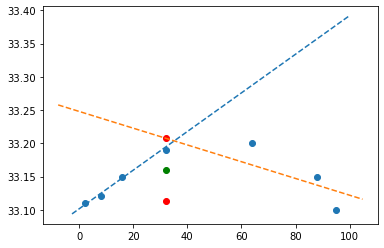

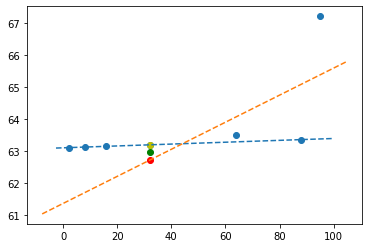

In [32]:
import numpy as np
import pandas as pd
#octal_window=pd.DataFrame()
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#lat = np.array(octal_window.lat.values)
#lon = np.array(octal_window.lon.values)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    print(x_vals,y_vals)
    plt.plot(x_vals, y_vals, '--')
lat=np.array([33.11,33.12,33.15,33.19,33.20,33.15,33.10])
lon=np.array([63.11,63.12,63.15,63.19,63.50,63.35,67.20])
td=np.array([2,8,16,32,64,88,95])

plt.scatter(td,lat)
mid = int(len(lon) / 2)
#td =np.array(((octal_window.index.values - octal_window.index.values.min()) / 1000000000).astype(float))
lat_f=lat[:mid]
td_f=td[:mid]
print(lat_f,td[mid])
LR_lat = LinearRegression()
LR_lat.fit(td_f.reshape(-1, 1) , lat_f.reshape(-1,1)) 
y_pred_lat = LR_lat.predict(np.array([4]).reshape(-1,1))
print(y_pred_lat[0][0])
lat_f=y_pred_lat[0][0]
print(LR_lat.intercept_,LR_lat.coef_)
abline(LR_lat.coef_[0],LR_lat.intercept_[0])
plt.scatter(td[mid],y_pred_lat[0][0],c='r')


lat_b=lat[mid:][::-1]
td_b=td[mid:][::-1]
print(lat_b,td[mid])
LR_lat = LinearRegression()
LR_lat.fit(td_b.reshape(-1, 1) , lat_b.reshape(-1,1)) 
y_pred_lat = LR_lat.predict(np.array(td[mid]).reshape(-1,1))
print(y_pred_lat[0][0])

print(LR_lat.intercept_,LR_lat.coef_)
abline(LR_lat.coef_[0],LR_lat.intercept_[0])
lat_b=y_pred_lat[0][0]
plt.scatter(td[mid],y_pred_lat[0][0],c='r')
lat_b=y_pred_lat[0][0]
lat_pred=(lat_f+lat_b)/2
plt.scatter(td[mid],lat_pred,c='g')
plt.show()

print("lon")
plt.scatter(td,lon)
mid = int(len(lon) / 2)
#td =np.array(((octal_window.index.values - octal_window.index.values.min()) / 1000000000).astype(float))
lon_f=lon[:mid]
td_f=td[:mid]
print(lon_f,td[mid])
LR_lon = LinearRegression()
LR_lon.fit(td_f.reshape(-1, 1) , lon_f.reshape(-1,1)) 
y_pred_lon = LR_lon.predict(np.array(td[mid]).reshape(-1,1))
print(y_pred_lon[0][0])
lon_f=y_pred_lon[0][0]
print(LR_lon.intercept_,LR_lon.coef_)
abline(LR_lon.coef_[0],LR_lon.intercept_[0])
plt.scatter(td[mid],y_pred_lon[0][0],c='y')


lon_b=lon[mid:][::-1]
td_b=td[mid:][::-1]
print(lon_b,td[mid])
LR_lon = LinearRegression()
LR_lon.fit(td_b.reshape(-1, 1) , lon_b.reshape(-1,1)) 
y_pred_lon = LR_lon.predict(np.array(td[mid]).reshape(-1,1))
print(y_pred_lon[0][0])

print(LR_lon.intercept_,LR_lon.coef_)
abline(LR_lon.coef_[0],LR_lon.intercept_[0])
lon_b=y_pred_lon[0][0]
plt.scatter(td[mid],y_pred_lon[0][0],c='r')
lon_b=y_pred_lon[0][0]
lon_pred=(lon_f+lon_b)/2
plt.scatter(td[mid],lon_pred,c='g')
plt.show()
print(lat[mid],lon[mid])
print(lat_pred,lon_pred)
from Trajlib2.core.utils import  haversine
d = haversine((lat[mid],lon[mid]), (lat_pred,lon_pred))
print(d)